In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from scipy import signal 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [2]:
#Importing temperature data
temperature=pd.read_csv(r'C:\Users\aturk\Desktop\worldtemp.csv')
temperature.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [3]:
canada=temperature[temperature['Country']=="Canada"]
canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2941 entries, 97255 to 100195
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2941 non-null   object 
 1   AverageTemperature             2504 non-null   float64
 2   AverageTemperatureUncertainty  2504 non-null   float64
 3   Country                        2941 non-null   object 
dtypes: float64(2), object(2)
memory usage: 114.9+ KB


In [4]:
canada.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,2504.000000,2504.000000
mean,-5.216659,1.256211
std,12.878074,1.046127
min,-28.736000,0.123000
25%,-17.702500,0.287000
50%,-4.728500,0.898000
75%,7.412750,2.120250
max,14.796000,5.275000


In [5]:
canada['dt']=pd.to_datetime(canada["dt"])
canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2941 entries, 97255 to 100195
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2941 non-null   datetime64[ns]
 1   AverageTemperature             2504 non-null   float64       
 2   AverageTemperatureUncertainty  2504 non-null   float64       
 3   Country                        2941 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 114.9+ KB


<ipython-input-5-048d6db33573>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada['dt']=pd.to_datetime(canada["dt"])


In [6]:
canada['dt'].min()

Timestamp('1768-09-01 00:00:00')

In [7]:
Canada_Temp=canada[canada["dt"]>="1990-01-01 00:00:00"]
Canada_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 99911 to 100195
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             285 non-null    datetime64[ns]
 1   AverageTemperature             285 non-null    float64       
 2   AverageTemperatureUncertainty  285 non-null    float64       
 3   Country                        285 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 11.1+ KB


In [8]:
Canada_Temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
99911,1990-01-01,-21.907,0.273,Canada
99912,1990-01-02,-23.930,0.248,Canada
99913,1990-01-03,-12.520,0.255,Canada
99914,1990-01-04,-5.902,0.241,Canada
99915,1990-01-05,2.523,0.239,Canada


In [9]:
Canada_Temp['dt'].max()

Timestamp('2013-01-09 00:00:00')

In [10]:
Canada_Temp['Year']=Canada_Temp.loc[:,'dt'].dt.year
Canada_Temp['Month']=Canada_Temp.loc[:,'dt'].dt.day
Canada_Temp.head()

<ipython-input-10-ba84cce95c33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada_Temp['Year']=Canada_Temp.loc[:,'dt'].dt.year
<ipython-input-10-ba84cce95c33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada_Temp['Month']=Canada_Temp.loc[:,'dt'].dt.day


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
99911,1990-01-01,-21.907,0.273,Canada,1990,1
99912,1990-01-02,-23.930,0.248,Canada,1990,2
99913,1990-01-03,-12.520,0.255,Canada,1990,3
99914,1990-01-04,-5.902,0.241,Canada,1990,4
99915,1990-01-05,2.523,0.239,Canada,1990,5


In [11]:
Canada_Temp["Day"]=1
Canada_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 99911 to 100195
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             285 non-null    datetime64[ns]
 1   AverageTemperature             285 non-null    float64       
 2   AverageTemperatureUncertainty  285 non-null    float64       
 3   Country                        285 non-null    object        
 4   Year                           285 non-null    int64         
 5   Month                          285 non-null    int64         
 6   Day                            285 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 17.8+ KB


<ipython-input-11-c53e225df2ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada_Temp["Day"]=1


In [12]:
Canada_Temp["Correct Date"]=pd.to_datetime(dict(year=Canada_Temp['Year'], month=Canada_Temp['Month'], day=Canada_Temp['Day']))
Canada_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 99911 to 100195
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             285 non-null    datetime64[ns]
 1   AverageTemperature             285 non-null    float64       
 2   AverageTemperatureUncertainty  285 non-null    float64       
 3   Country                        285 non-null    object        
 4   Year                           285 non-null    int64         
 5   Month                          285 non-null    int64         
 6   Day                            285 non-null    int64         
 7   Correct Date                   285 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 20.0+ KB


<ipython-input-12-20d5de9bcce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada_Temp["Correct Date"]=pd.to_datetime(dict(year=Canada_Temp['Year'], month=Canada_Temp['Month'], day=Canada_Temp['Day']))


In [13]:
Canada_Temp.drop(['AverageTemperatureUncertainty','Country'], axis=1, inplace=True)
Canada_Temp.head()

C:\Users\aturk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,dt,AverageTemperature,Year,Month,Day,Correct Date
99911,1990-01-01,-21.907,1990,1,1,1990-01-01
99912,1990-01-02,-23.930,1990,2,1,1990-02-01
99913,1990-01-03,-12.520,1990,3,1,1990-03-01
99914,1990-01-04,-5.902,1990,4,1,1990-04-01
99915,1990-01-05,2.523,1990,5,1,1990-05-01


In [14]:
Canada_Temp.drop(['dt','Year','Month',"Day"], axis=1, inplace=True)
Canada_Temp.head()

C:\Users\aturk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AverageTemperature,Correct Date
99911,-21.907,1990-01-01
99912,-23.930,1990-02-01
99913,-12.520,1990-03-01
99914,-5.902,1990-04-01
99915,2.523,1990-05-01


In [15]:
Canada_Temp=Canada_Temp.set_index('Correct Date')
Canada_Temp.head()

,AverageTemperature
Correct Date,
1990-01-01,-21.907
1990-02-01,-23.930
1990-03-01,-12.520
1990-04-01,-5.902
1990-05-01,2.523


In [16]:
Canada_Temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 285 entries, 1990-01-01 to 2013-09-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  285 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


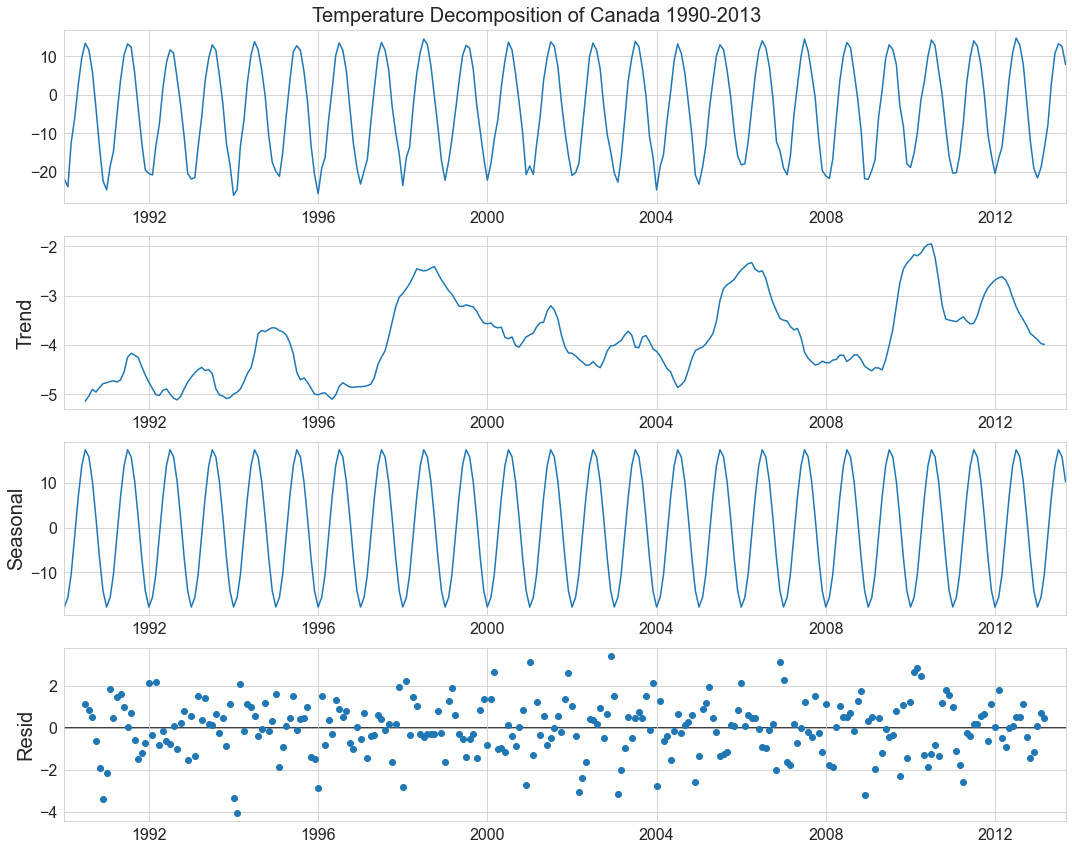

In [17]:
#Decomposition to Seasonal & Trend & Remainder Components
from pylab import rcParams
rcParams['figure.figsize']=15,12
rcParams['axes.labelsize']=20
rcParams['ytick.labelsize']=16
rcParams['xtick.labelsize']=16
decomposition = sm.tsa.seasonal_decompose(Canada_Temp, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition of Canada 1990-2013', fontsize=20) 
plt.tight_layout()

In [18]:
"""ADF test, where the null hypothesis is that the time series of average temperature in Canada possesses a unit root 
(or random walk with drift) and is non-stationary.
So, if the P-Value in ADF test is less than the significance level (0.05),
you reject the null hypothesis and the series is stationary"""

from statsmodels.tsa.stattools import adfuller
#check for stationarity

def adf_test(series, title=''):
    """
    Pass in a time series and an optinal title, returns an ADF report
    
    """
    print ('Augmented Dickey-Fuller Test : {}'.format(title))
    result = adfuller(series.dropna(), autolag='AIC') #.dropna() handles differenced data
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
        print(out.to_string()) #.to_string() removes the line 'dtype: float64'
        
        if result[1] <= 0.05:
            print("Strong evidence aganist the null hypothesis")
            print("Reject the null hypothesis")
            print("Data has no unit root and is stationary")
            
        else :
            print("Weak evidence aganist the null hypothesis")
            print("Fail to reject the null hypothesis")
            print("Data has a unit root and is non stationary")
    adf_test(Canada_Temp[['AverageTemperature']]['AverageTemperature'], title='')

In [ ]:
adf_test(Canada_Temp[['AverageTemperature']]['AverageTemperature'], title='')

Augmented Dickey-Fuller Test : 
ADF test statistic      -4.868207
p-value                  0.000040
# lags used             20.000000
# observations         744.000000
critical value (1%)     -3.439170
Strong evidence aganist the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
ADF test statistic      -4.868207
p-value                  0.000040
# lags used             20.000000
# observations         744.000000
critical value (1%)     -3.439170
critical value (5%)     -2.865433
Strong evidence aganist the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
ADF test statistic       -4.868207
p-value                   0.000040
# lags used              20.000000
# observations          744.000000
critical value (1%)      -3.439170
critical value (5%)      -2.865433
critical value (10%)     -2.568843
Strong evidence aganist the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey

In [ ]:
#The series is stationary. Nevertheless, p-value=0.0004 and we can apply the difference to see its effect

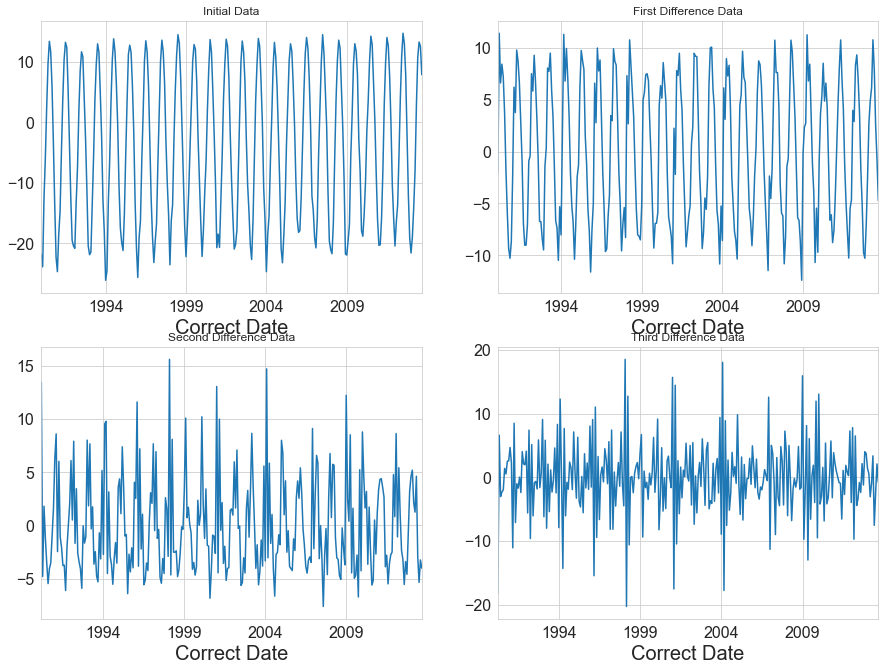

In [19]:
# Making the data stationary to be able to conduct time series forecast
from statsmodels.tsa.statespace.tools import diff
fig, ax =  plt.subplots(nrows=2, ncols=2, figsize=(15,11))

Canada_Temp['TempDiff1'] = diff(Canada_Temp['AverageTemperature'], k_diff=1)
Canada_Temp['TempDiff2'] = diff(Canada_Temp['AverageTemperature'], k_diff=2)
Canada_Temp['TempDiff3'] = diff(Canada_Temp['AverageTemperature'], k_diff=3)

Canada_Temp['AverageTemperature'].plot(title='Initial Data', ax=ax[0][0]).autoscale(axis='x', tight=True)
Canada_Temp['TempDiff1'].plot(title='First Difference Data', ax=ax[0][1]).autoscale(axis='x', tight=True)
Canada_Temp['TempDiff2'].plot(title='Second Difference Data', ax=ax[1][0]).autoscale(axis='x', tight=True)
Canada_Temp['TempDiff3'].plot(title='Third Difference Data', ax=ax[1][1]).autoscale(axis='x', tight=True)

C:\Users\aturk\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\aturk\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


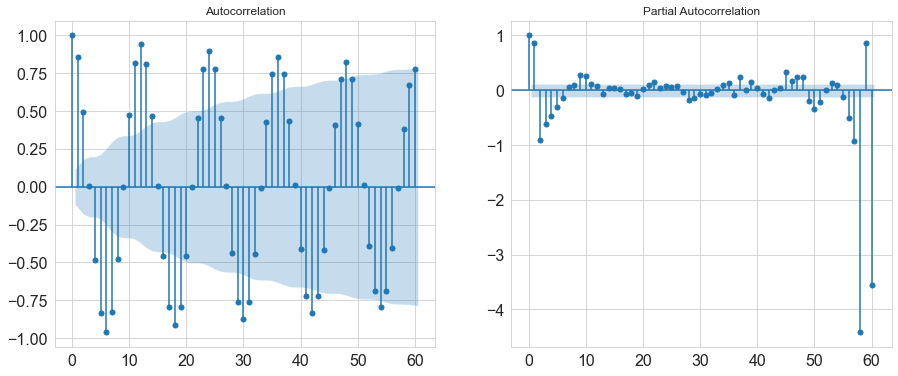

In [20]:
#Autocorrelation
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(Canada_Temp['AverageTemperature'], nlags=60) # just the numbers
plot_acf(Canada_Temp['AverageTemperature'].tolist(), lags=60, ax=ax[0]); # just the plot
plot_pacf(Canada_Temp['AverageTemperature'].tolist(), lags=60, ax=ax[1]); # just the plot

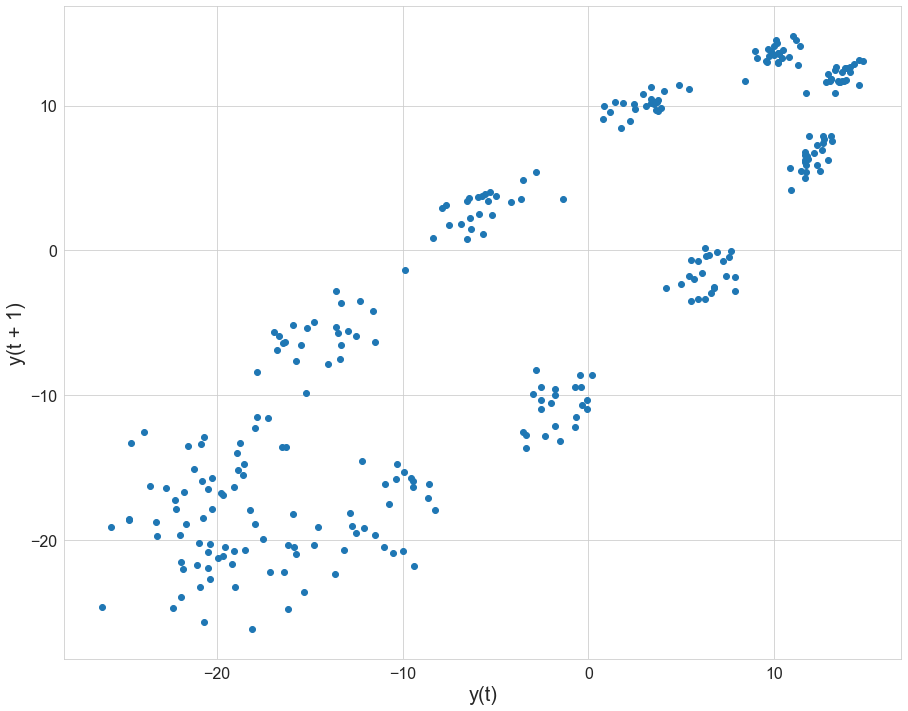

In [22]:
#Lag Scatter Plot
from pandas.plotting import lag_plot
lag_plot(Canada_Temp['AverageTemperature']);

In [26]:
Canada_Temp.head()

,AverageTemperature,TempDiff1,TempDiff2,TempDiff3
Correct Date,,,,
1990-01-01,-21.907,NaN,NaN,NaN
1990-02-01,-23.930,-2.023,NaN,NaN
1990-03-01,-12.520,11.410,13.433,NaN
1990-04-01,-5.902,6.618,-4.792,-18.225
1990-05-01,2.523,8.425,1.807,6.599


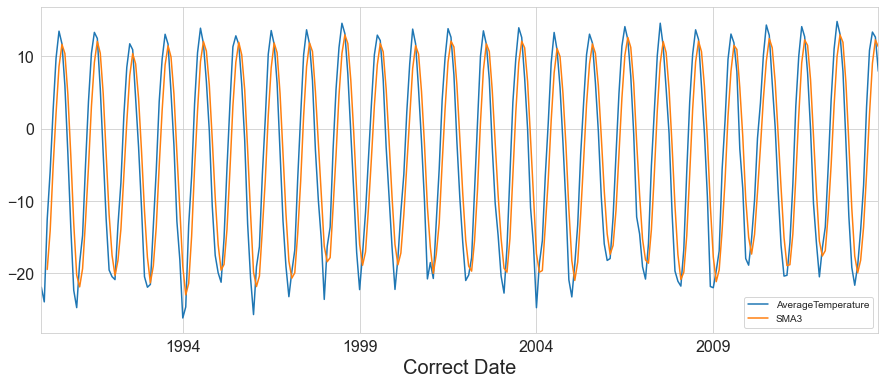

In [33]:
#Moving Average
Canada_Temp=Canada_Temp[['AverageTemperature']]
Canada_Temp['SMA3'] = Canada_Temp.rolling(window=3).mean() 
Canada_Temp.plot(figsize=(15,6));

C:\Users\aturk\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


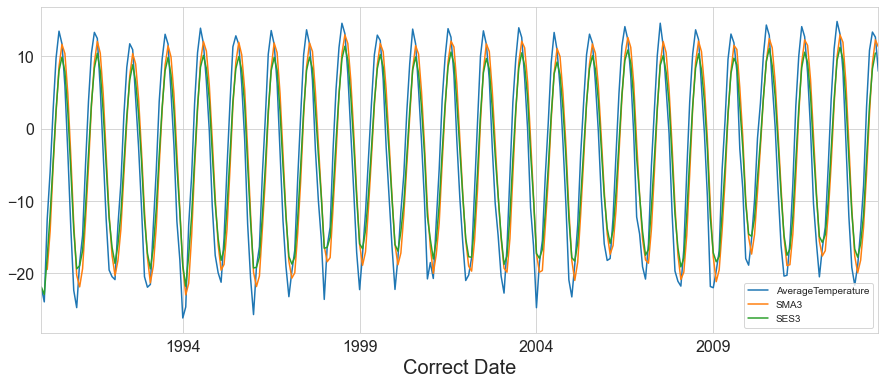

In [34]:
#Exponentially Weighted Moving Average (EWMA)

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 3
alpha = 2/(span+1)

Canada_Temp.index.freq = 'MS'
Canada_Temp['SES3']=SimpleExpSmoothing(Canada_Temp['AverageTemperature']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
Canada_Temp.plot(figsize=(15,6));

C:\Users\aturk\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


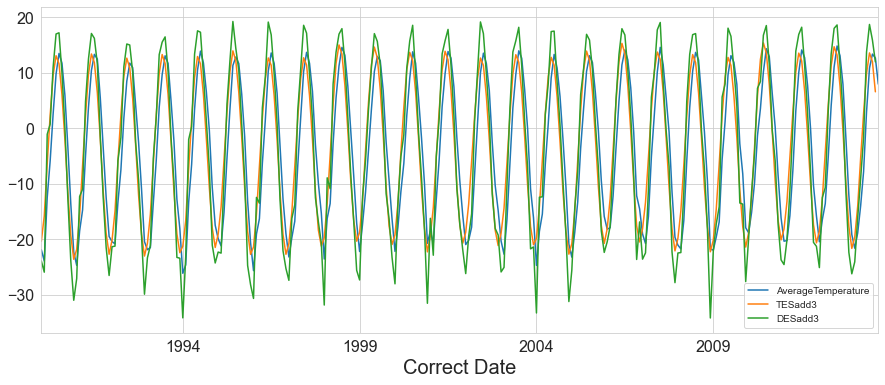

In [35]:
#Triple Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

Canada_Temp['DESadd3'] = ExponentialSmoothing(Canada_Temp['AverageTemperature'], trend='add').fit().fittedvalues.shift(-1)
Canada_Temp['TESadd3'] = ExponentialSmoothing(Canada_Temp['AverageTemperature'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(-1)
Canada_Temp[['AverageTemperature', 'TESadd3', 'DESadd3']].plot(figsize=(15,6));
